In [1]:
import os 
import pandas as pd

In [4]:
%pwd

'e:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Flight price prediction'

In [3]:
os.chdir('../')

In [5]:
data = pd.read_csv('artifact\\feature_extraction\\feature_extracted_data.csv')
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Duration(minute),Year_of_Journey,Month_of_Journey,...,Flight_Duration_Category,Dep_Hour,Arr_Hour,Dep_Minute,Arr_Minute,Price_per_minute,Price_per_Stop,Seasonal_Price_Change,Price_vs_Season_Avg,Price_per_Hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,0,3897.0,170,2019,3,...,Short,22,1,20,10,22.923529,3897.0,9208.363736,-5311.363736,1375.411765
1,Air India,2019-05-01,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2,7662.0,445,2019,5,...,Medium,5,13,50,15,17.217978,2554.0,9208.363736,-1546.363736,1033.078652


In [5]:
# check for missing values 

data.isnull().sum()

Airline                        0
Date_of_Journey                0
Source                         0
Destination                    0
Route                          1
Total_Stops                    0
Price                       2671
Duration(minute)               0
Year_of_Journey                0
Month_of_Journey               0
Day_of_Journey                 0
Season                         0
Time_of_Day                    0
Flight_Duration_Category       0
Dep_Hour                       0
Arr_Hour                       0
Dep_Minute                     0
Arr_Minute                     0
Price_per_minute            2671
Price_per_Stop              2671
Seasonal_Price_Change          0
Price_vs_Season_Avg         2671
Price_per_Hour              2671
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

np.int64(42950)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Duration(minute),Year_of_Journey,Month_of_Journey,...,Flight_Duration_Category,Dep_Hour,Arr_Hour,Dep_Minute,Arr_Minute,Price_per_minute,Price_per_Stop,Seasonal_Price_Change,Price_vs_Season_Avg,Price_per_Hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,0,3897.0,170,2019,3,...,Short,22,1,20,10,22.923529,3897.000000,9208.363736,-5311.363736,1375.411765
1,Air India,2019-05-01,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2,7662.0,445,2019,5,...,Medium,5,13,50,15,17.217978,2554.000000,9208.363736,-1546.363736,1033.078652
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2,13882.0,1140,2019,6,...,Long,9,4,25,25,12.177193,4627.333333,8828.796134,5053.203866,730.631579
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU -> NAG -> BLR,1,6218.0,325,2019,5,...,Medium,18,23,5,30,19.132308,3109.000000,9208.363736,-2990.363736,1147.938462
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR -> NAG -> DEL,1,13302.0,285,2019,3,...,Short,16,21,50,35,46.673684,6651.000000,9208.363736,4093.636264,2800.421053


In [10]:
data.drop (['Date_of_Journey','Route','Year_of_Journey'], axis=1, inplace=True)

In [11]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Duration(minute),Month_of_Journey,Day_of_Journey,Season,Time_of_Day,Flight_Duration_Category,Dep_Hour,Arr_Hour,Dep_Minute,Arr_Minute,Price_per_minute,Price_per_Stop,Seasonal_Price_Change,Price_vs_Season_Avg,Price_per_Hour
0,IndiGo,Banglore,New Delhi,0,3897.0,170,3,24,Spring,Night,Short,22,1,20,10,22.923529,3897.0,9208.363736,-5311.363736,1375.411765
1,Air India,Kolkata,Banglore,2,7662.0,445,5,1,Spring,Night,Medium,5,13,50,15,17.217978,2554.0,9208.363736,-1546.363736,1033.078652


In [12]:
data.columns    

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Duration(minute)', 'Month_of_Journey', 'Day_of_Journey', 'Season',
       'Time_of_Day', 'Flight_Duration_Category', 'Dep_Hour', 'Arr_Hour',
       'Dep_Minute', 'Arr_Minute', 'Price_per_minute', 'Price_per_Stop',
       'Seasonal_Price_Change', 'Price_vs_Season_Avg', 'Price_per_Hour'],
      dtype='object')

In [13]:
# identify the categorical and numerical columns
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
numerical_columns = [col for col in data.columns if data[col].dtype != 'object']

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

category_mappings = {}  # Dictionary to store category-value mappings

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
    category_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mappings
for col, mapping in category_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Airline: {'Air Asia': np.int64(0), 'Air India': np.int64(1), 'GoAir': np.int64(2), 'IndiGo': np.int64(3), 'Jet Airways': np.int64(4), 'Jet Airways Business': np.int64(5), 'Multiple carriers': np.int64(6), 'Multiple carriers Premium economy': np.int64(7), 'SpiceJet': np.int64(8), 'Trujet': np.int64(9), 'Vistara': np.int64(10), 'Vistara Premium economy': np.int64(11)}
Mapping for Source: {'Banglore': np.int64(0), 'Chennai': np.int64(1), 'Delhi': np.int64(2), 'Kolkata': np.int64(3), 'Mumbai': np.int64(4)}
Mapping for Destination: {'Banglore': np.int64(0), 'Cochin': np.int64(1), 'Delhi': np.int64(2), 'Hyderabad': np.int64(3), 'Kolkata': np.int64(4), 'New Delhi': np.int64(5)}
Mapping for Season: {'Spring': np.int64(0), 'Summer': np.int64(1)}
Mapping for Time_of_Day: {'Afternoon': np.int64(0), 'Evening': np.int64(1), 'Morning': np.int64(2), 'Night': np.int64(3)}
Mapping for Flight_Duration_Category: {'Long': np.int64(0), 'Medium': np.int64(1), 'Short': np.int64(2)}


In [15]:
import numpy as np

In [16]:
# check multicollinearity using the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = data.copy()
vif_data = vif_data[numerical_columns]

# Drop rows with NaN or infinite values
vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()

vif = pd.DataFrame()
vif['Features'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

vif

c:\Users\nasir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,Total_Stops,9.042227
1,Price,inf
2,Duration(minute),2.288638
3,Year_of_Journey,7296.461790
4,Month_of_Journey,2.489753
5,Day_of_Journey,1.054441
6,Dep_Hour,1.023317
7,Arr_Hour,1.038269
8,Dep_Minute,1.014163
9,Arr_Minute,1.056493


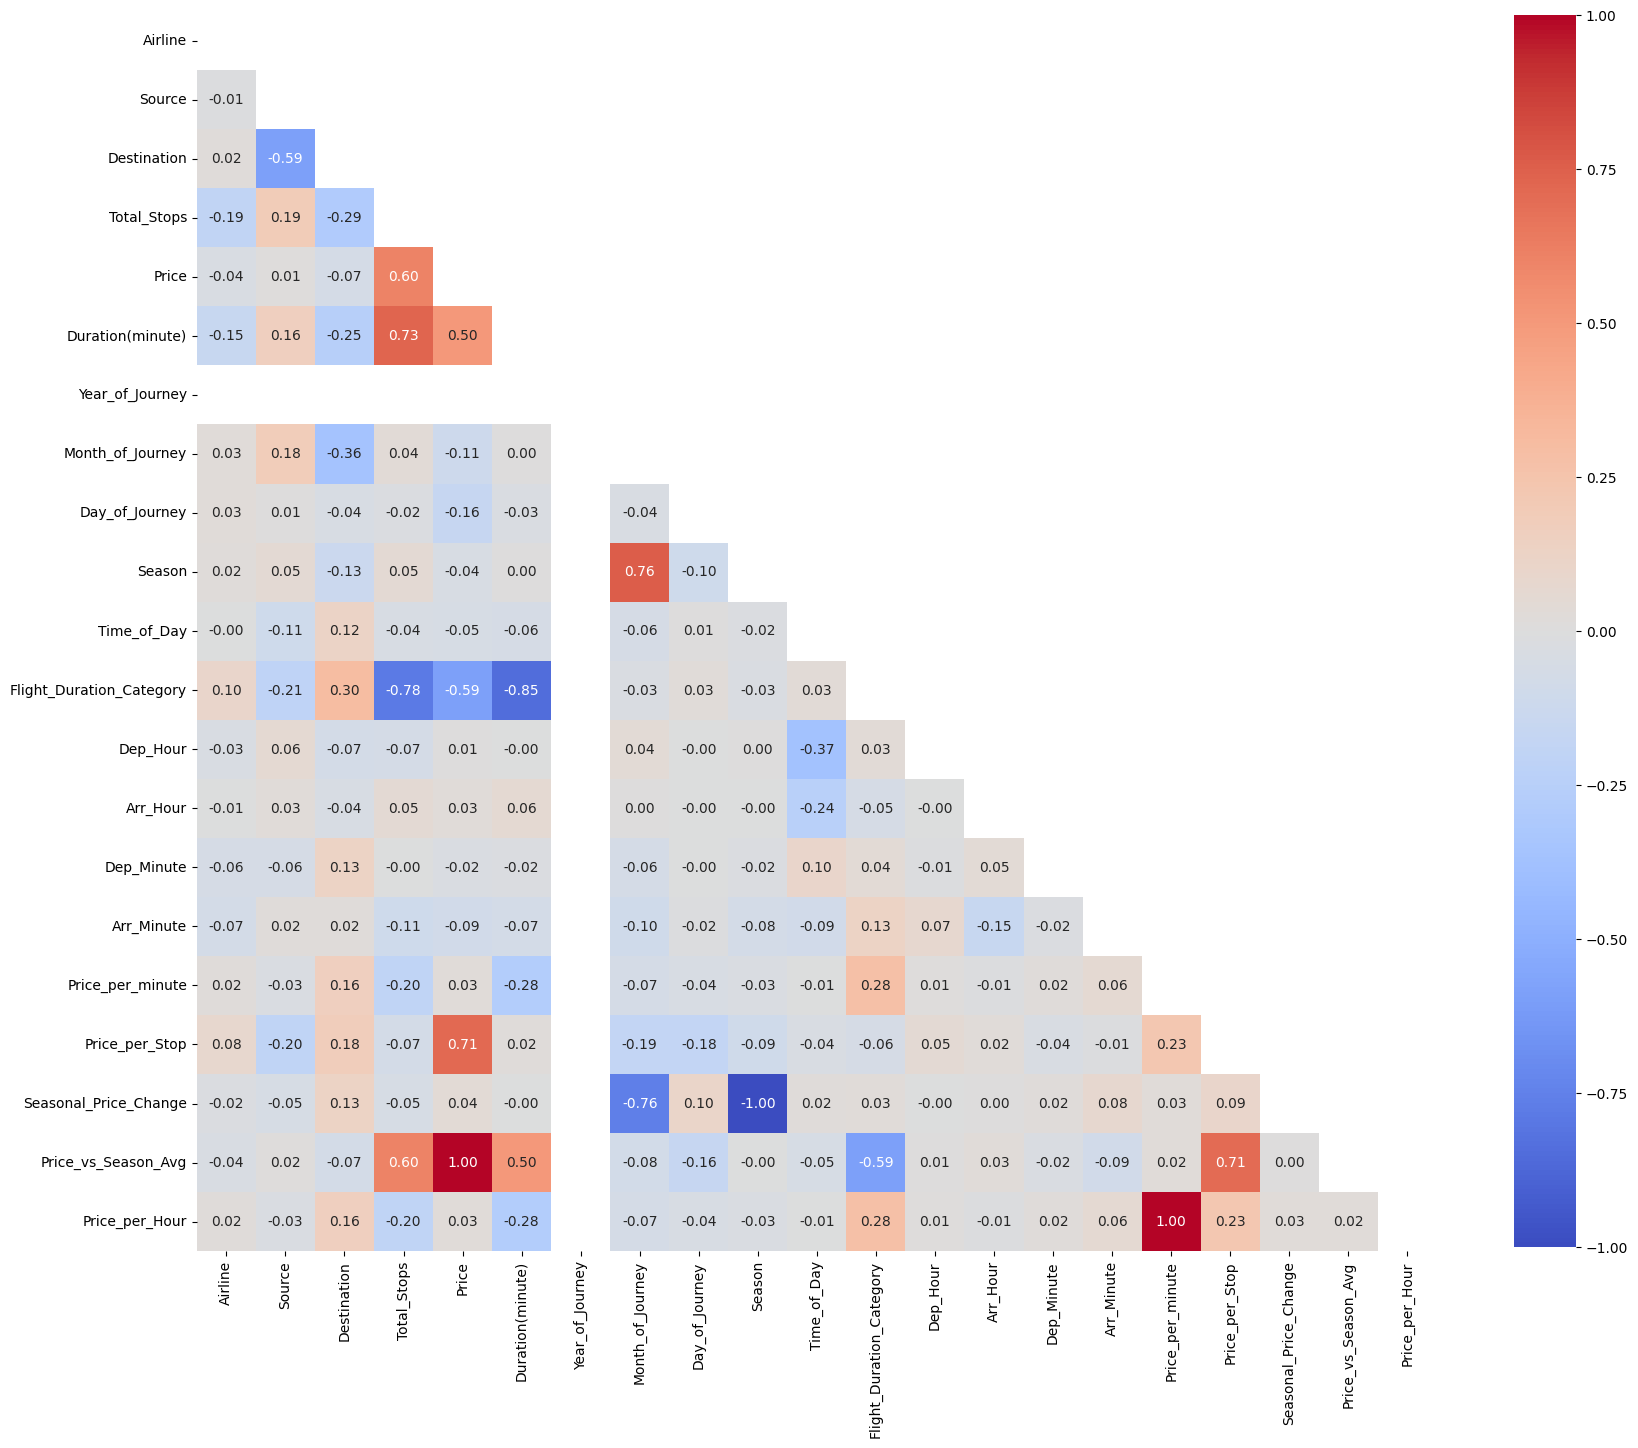

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Mask the upper triangle of the correlation matrix to display only one side
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with the mask applied
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, square=True, cbar_kws={"shrink": .8})
plt.show()


In [22]:
data.drop(['Price_per_minute','Price_vs_Season_Avg'], axis=1, inplace=True)

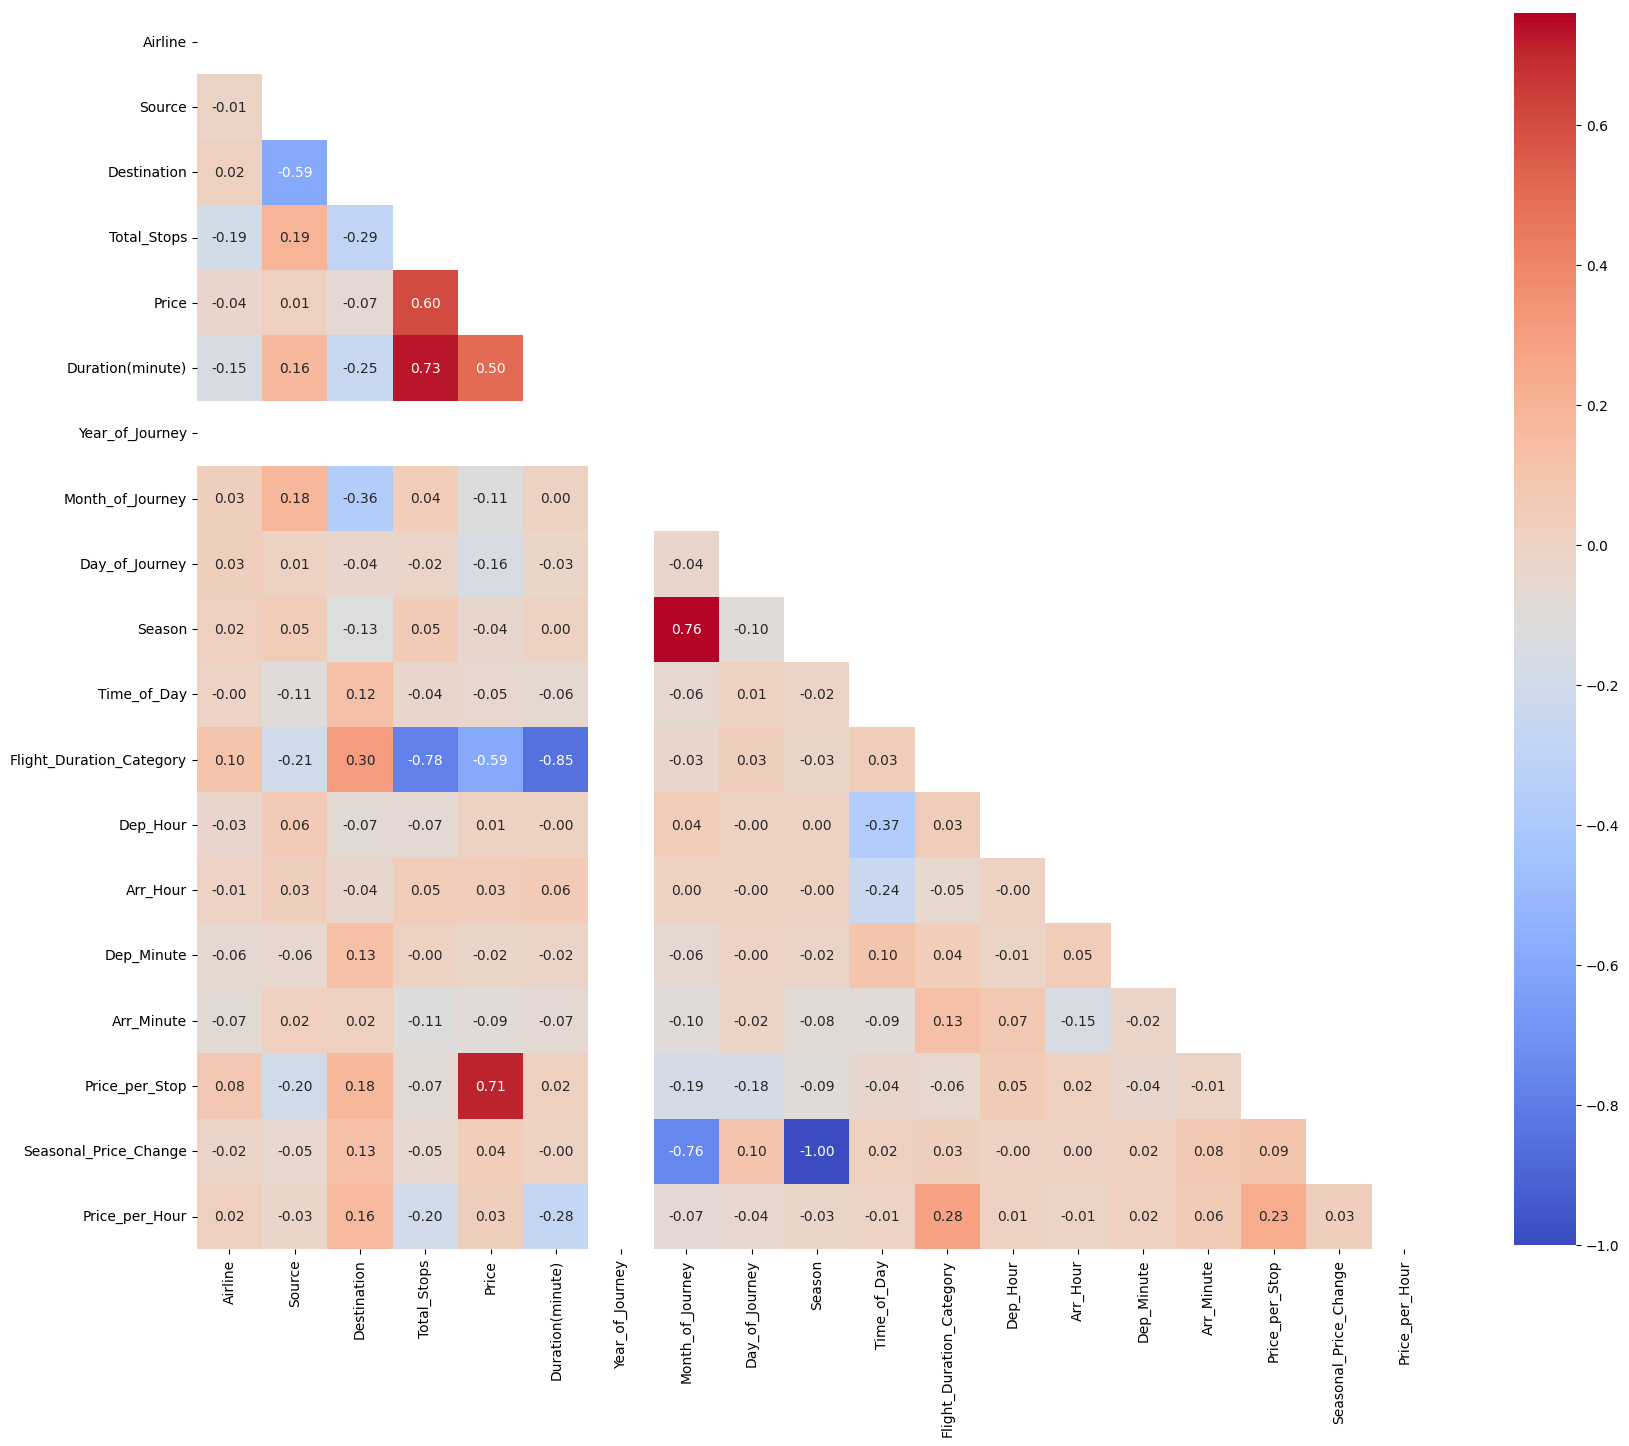

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Mask the upper triangle of the correlation matrix to display only one side
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with the mask applied
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, square=True, cbar_kws={"shrink": .8})
plt.show()


In [ ]:
# calculate vif 
from sklearn.preprocessing import StandardScaler

vif_data = data.copy()

standard_scaler = StandardScaler()
vif_data = standard_scaler.fit_transform(vif_data)

vif_data = pd.DataFrame(vif_data, columns=data.columns)

vif = pd.DataFrame()

vif['Features'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

vif


In [26]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Duration(minute),Year_of_Journey,Month_of_Journey,Day_of_Journey,Season,Time_of_Day,Flight_Duration_Category,Dep_Hour,Arr_Hour,Dep_Minute,Arr_Minute,Price_per_Stop,Seasonal_Price_Change,Price_per_Hour
0,3,0,5,0,3897.0,170,2019,3,24,0,3,2,22,1,20,10,3897.000000,9208.363736,1375.411765
1,1,3,0,2,7662.0,445,2019,5,1,0,3,1,5,13,50,15,2554.000000,9208.363736,1033.078652
2,4,2,1,2,13882.0,1140,2019,6,9,1,2,0,9,4,25,25,4627.333333,8828.796134,730.631579
